# Trabajo Práctico N° 2 : Ecuaciones diferenciales de orden superior
Integrantes : Agustin Augurusa, Gonzalo Mato, Juan Cruz Estevez, Pedro Elizalde

## Introducción
Dado que este es un experimento numérico para medir la efectividad de los métodos para
la resolución numérica de ecuaciones diferenciales se ha elegido un problema cuya
solución analítica es posible hallar usando los métodos que provee el Análisis Matemático.

Se pide diseñar una aplicación para el método predictor-corrector (Adams
Bashforth-Moulton) de quinto orden acoplado con el método de Runge Kutta de 4 orden
(para los primeros valores) que sea capaz de resolver un sistema de 3 ecuaciones
diferenciales de primer orden.

Luego, probar la efectividad del algoritmo con la siguiente ecuacion diferencial de tercer orden

$$ y''' + y'' - 4y' - 4y = x $$

con los siguientes valores iniciales $ y(0) = 2.25 y'(0) = -3.25; y''(0) = 5 $

## Solucion Analitica

$$ -\frac{1}{8}e^x^2 + e^{-x} + \frac{9}{8}e^{-2x} - \frac{x}{4} + \frac{1}{4} $$

## Algoritmo

Dado el problema de valores iniciales

$$ y' = f(x,y) $$ con $$ y(x_o) = y_o $$

Primero se calculan los $ y_1, y_2, y_3 $ e $ y_4 $ utilizando Runge-Kutta de orden 4.
A partir de $ y_5 $, se predice el valor de $ y_i $ con Adams-Bashford de orden 5 y se mejora el valor anterior tantas
veces como sea necesario con Adams-Moulton de orden 5.

### Sistema de ecuaciones

Para resolver nuestra ecuación diferencial de tercer orden mediante el algoritmo mencionado anteriormente,
primero definimos un sistema de EDO de primer orden (una ecuación por grado de la original) a partir de un cambio de variables.

In [ ]:
import math
e = math.e

f1 = lambda x, y, z, w: z
f2 = lambda x, y, z, w: w
f3 = lambda x, y, z, w: x + 4y +4z - w

#Solucion Analitica
solución = lambda x: (-1/8) * e ** (2*x) + e** (-x) + (9/8) * e ** (-2 * x) - x/4 + (1 / 4)

### Codigo del Algoritmo

Primero adaptamos el algoritmo de Runge Kutta para el sistema de ecuaciones. Acoplado con el método predictor-corrector
AB y AM, se debe hacer RK hasta $y_4$ (4ta iteración de i), luego seguir con AB y AM a partir de $y_5$, hasta llegar a $y(b)$.
Para cada valor de AB obtenido se lo mejoro un total de 10 veces con AM.

Parámetros:
    - f1, f2, f3 : sistema de ecuaciones
    - x0, y0, z0, w0 : valores iniciales
    - h : incrementos
    - b : valor en el cual se quiere evaluar la función

In [ ]:
def resolution_3_EDO_system(f1, f2, f3, x0, y0, z0, w0, h, b):
    y = [y0]
    x = [x0]
    z = [z0]
    w = [w0]
    for i in range(1, 5):
        x.append(x0 + i * h)
        y.append(0)
        z.append(0)
        w.append(0)
    for i in range(4):
        k1 = h * f1(x[i], y[i], z[i], w[i])  # z
        l1 = h * f2(x[i], y[i], z[i], w[i])  # w
        m1 = h * f3(x[i], y[i], z[i], w[i])  # w'

        k2 = h * f1(x[i] + 0.5 * h, y[i] + 0.5 * k1, z[i] + 0.5 * l1, w[i] + 0.5 * m1)
        l2 = h * f2(x[i] + 0.5 * h, y[i] + 0.5 * k1, z[i] + 0.5 * l1, w[i] + 0.5 * m1)
        m2 = h * f3(x[i] + 0.5 * h, y[i] + 0.5 * k1, z[i] + 0.5 * l1, w[i] + 0.5 * m1)

        k3 = h * f1(x[i] + 0.5 * h, y[i] + 0.5 * k2, z[i] + 0.5 * l2, w[i] + 0.5 * m2)
        l3 = h * f2(x[i] + 0.5 * h, y[i] + 0.5 * k2, z[i] + 0.5 * l2, w[i] + 0.5 * m2)
        m3 = h * f3(x[i] + 0.5 * h, y[i] + 0.5 * k2, z[i] + 0.5 * l2, w[i] + 0.5 * m2)

        k4 = h * f1(x[i] + h, y[i] + k3, z[i] + l3, w[i] + m3)
        l4 = h * f2(x[i] + h, y[i] + k3, z[i] + l3, w[i] + m3)
        m4 = h * f3(x[i] + h, y[i] + k3, z[i] + l3, w[i] + m3)

        y[i + 1] = y[i + 1] = y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        z[i + 1] = z[i + 1] = z[i] + (l1 + 2 * l2 + 2 * l3 + l4) / 6
        w[i + 1] = w[i + 1] = w[i] + (m1 + 2 * m2 + 2 * m3 + m4) / 6
    # Adams-Bashforth de 5 pasos
    i = 4
    while x[i] != b:
        x.append(x0 + (i + 1) * h)
        y.append(y[i] + (h / 720) * (1901 * f1(x[i], y[i], z[i], w[i]) -
                                     2774 * f1(x[i - 1], y[i - 1], z[i - 1], w[i - 1]) +
                                     2616 * f1(x[i - 2], y[i - 2], z[i - 2], w[i - 2]) -
                                     1274 * f1(x[i - 3], y[i - 3], z[i - 3], w[i - 3])) +
                                     251 * f1(x[i - 4], y[i - 4], z[i - 4], w[i - 4]))
        z.append(z[i] + (h / 720) * (1901 * f2(x[i], y[i], z[i], w[i]) -
                                     2774 * f2(x[i - 1], y[i - 1], z[i - 1], w[i - 1]) +
                                     2616 * f2(x[i - 2], y[i - 2], z[i - 2], w[i - 2]) -
                                     1274 * f2(x[i - 3], y[i - 3], z[i - 3], w[i - 3])) +
                                     251 * f2(x[i - 4], y[i - 4], z[i - 4], w[i - 4]))
        w.append(w[i] + (h / 720) * (1901 * f3(x[i], y[i], z[i], w[i]) -
                                     2774 * f3(x[i - 1], y[i - 1], z[i - 1], w[i - 1]) +
                                     2616 * f3(x[i - 2], y[i - 2], z[i - 2], w[i - 2]) -
                                     1274 * f3(x[i - 3], y[i - 3], z[i - 3], w[i - 3])) +
                                     251 * f3(x[i - 4], y[i - 4], z[i - 4], w[i - 4]))
        # Adams-Moulton de 5 pasos
        for j in range(10):
            y[i + 1] = y[i] + (h / 720) * (251 * f1(x[i + 1], y[i + 1], z[i + 1], w[i + 1]) +
                                           646 * f1(x[i], y[i], z[i], w[i]) -
                                           264 * f1(x[i - 1], y[i - 1], z[i - 1], w[i - 1]) +
                                           106 * f1(x[i - 2], y[i - 2], z[i - 2], w[i - 2]) -
                                           19 * f1(x[i - 3], y[i - 3], z[i - 3], w[i - 3]))
            z[i + 1] = z[i] + (h / 720) * (251 * f2(x[i + 1], y[i + 1], z[i + 1], w[i + 1]) +
                                           646 * f2(x[i], y[i], z[i], w[i]) -
                                           264 * f2(x[i - 1], y[i - 1], z[i - 1], w[i - 1]) +
                                           106 * f2(x[i - 2], y[i - 2], z[i - 2], w[i - 2]) -
                                           19 * f2(x[i - 3], y[i - 3], z[i - 3], w[i - 3]))
            w[i + 1] = w[i] + (h / 720) * (251 * f3(x[i + 1], y[i + 1], z[i + 1], w[i + 1]) +
                                           646 * f3(x[i], y[i], z[i], w[i]) -
                                           264 * f3(x[i - 1], y[i - 1], z[i - 1], w[i - 1]) +
                                           106 * f3(x[i - 2], y[i - 2], z[i - 2], w[i - 2]) -
                                           19 * f3(x[i - 3], y[i - 3], z[i - 3], w[i - 3]))
        i += 1
    return y[i]

### Datos Obtenidos

Utilizando la solución analítica:

x|y
-|-
1|0.20610
2|0.43394
3|3.99154
4|19.74790
5|78.34093
6|280.16321
7|944.32459
8|3063.76296
9|9678.68379
10|29980.46741

Utilizando el algoritmo:

- Con $ h = 0.2 $

x|y
-|-
1|0.20607
2|0.43396
3|3.99173
4|19.74876
5|78.34436
6|280.17577
7|944.36841
8|3063.91077
9|9679.16998
10|29982.03561


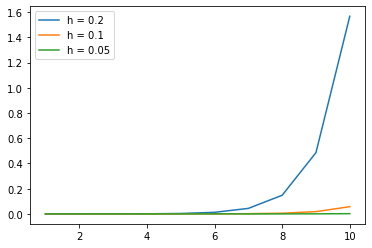

In [3]:
import pylab as pl

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# Resultados utilizando la funcion analitica
y = [0.20610, 0.43394, 3.99154, 19.74790, 78.34093, 280.16321, 944.32459, 3063.76296, 9678.68379, 29980.46741]
# Resultados utilizando el algoritmo con h = 0.2
y_1 = [0.20607, 0.43396, 3.99173, 19.74876, 78.34436, 280.17577, 944.36841, 3063.91077, 9679.16998, 29982.03561]

y_error1 = [y_1[0]-y[0], y_1[1]-y[1], y_1[2]-y[2], y_1[3]-y[3], y_1[4]-y[4], y_1[5]-y[5], y_1[6]-y[6], y_1[7]-y[7], y_1[8]-y[8], y_1[9]-y[9]]
y_error2 = [y_2[0]-y[0], y_2[1]-y[1], y_2[2]-y[2], y_2[3]-y[3], y_2[4]-y[4], y_2[5]-y[5], y_2[6]-y[6], y_2[7]-y[7], y_2[8]-y[8], y_2[9]-y[9]]
y_error3 = [y_3[0]-y[0], y_3[1]-y[1], y_3[2]-y[2], y_3[3]-y[3], y_3[4]-y[4], y_3[5]-y[5], y_3[6]-y[6], y_3[7]-y[7], y_3[8]-y[8], y_3[9]-y[9]]

pl.plot(x, y_error1, label="h = 0.2")
pl.legend(loc='upper left')
pl.show()

### Conclusión

Podemos obsevar que a medida que se reduce el valor del $h$, el error también disminuye, ya que con un $h$ mas chico el
tamaño de paso entre iteracion es menor.
